In [1]:
import pandas as pd
import numpy as np
import math
import operator

In [4]:
col=['sepal_length','sepal_width','petal_length','petal_width','type']
iris=pd.read_csv("iris.csv",names=col)

In [5]:
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type")
print(iris['type'].value_counts())
print("*********")
print(iris.describe())

First five rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: type, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000    

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
x=iris.iloc[:,:4] #all parameters
y=iris["type"] #class labels

In [13]:
neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(iris.iloc[:,:4],iris["type"])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [14]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:",neigh.predict(test))
print("neighbors",neigh.kneighbors(test))

     0    1    2    3
0  1.4  3.6  3.4  1.2
predicted: ['Iris-setosa']
neighbors (array([[3.7067506 , 3.80657326, 3.81706694, 3.8340579 ]]), array([[57,  8, 42, 93]], dtype=int64))


In [15]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

In [16]:
x=iris.iloc[1:,:3]#features
y=iris.iloc[1:,4:]#class labels
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size determines the percentage of test data you want here
#train=80% and test=20% data is randomly split

In [17]:
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 15 using brute is 100.0


In [18]:
print("classification_report using brute force")
print(classification_report(y_test,pred))

classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30



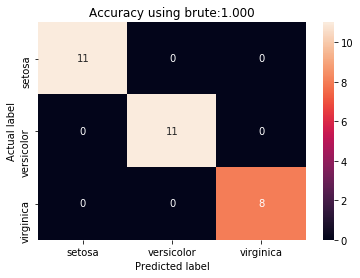

In [19]:
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'kd_tree')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'kd_tree')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using kd-tree is {1}".format(optimal_n,acc))

The accuracy for optimal k = 15 using kd-tree is 100.0


In [21]:
print("classification_report using kd-tree")
print(classification_report(y_test,pred))

classification_report using kd-tree
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30



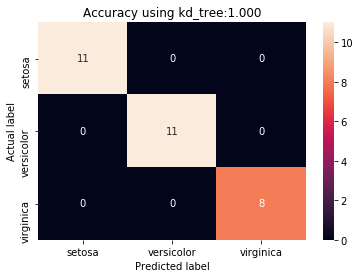

In [22]:
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using kd_tree:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()